In [1]:
import os
import csv
import numpy as np
import allan_variance
import matplotlib.pyplot as plt
import pandas as pd

/home/su/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
IMU1_path = 'dataset/static/magpie2Dataset_StaticData_imu1.csv'
IMU2_path = 'dataset/static/magpie2Dataset_StaticData_imu2.csv'
IMU3_path = 'dataset/static/magpie2Dataset_StaticData_imu3.csv'
IMU4_path = 'dataset/static/magpie2Dataset_StaticData_imu4.csv'
IMU5_path = 'dataset/static/magpie2Dataset_StaticData_imu5.csv'

df1 = pd.read_csv(IMU1_path)
df2 = pd.read_csv(IMU2_path)
df3 = pd.read_csv(IMU3_path)
df4 = pd.read_csv(IMU4_path)
df5 = pd.read_csv(IMU5_path)

In [3]:
# List of dataframes
dfs = [df1, df2, df3, df4, df5]

# Initialize empty dictionaries to store the results
t_data = {}
gx_data, gy_data, gz_data = {}, {}, {}
ax_data, ay_data, az_data = {}, {}, {}

# Loop through the dataframes and extract the necessary columns as arrays
for i, df in enumerate(dfs, start=1):
    t_data[f'df{i}_t'] = np.array((df['t']-df['t'][0])/1e9)
    gx_data[f'df{i}_gx'] = np.array(df['gx'])
    gy_data[f'df{i}_gy'] = np.array(df['gy'])
    gz_data[f'df{i}_gz'] = np.array(df['gz'])
    ax_data[f'df{i}_ax'] = np.array(df['ax'])
    ay_data[f'df{i}_ay'] = np.array(df['ay'])
    az_data[f'df{i}_az'] = np.array(df['az'])

dt1 = np.mean(np.diff(t_data['df1_t']))
dt2 = np.mean(np.diff(t_data['df2_t']))
dt3 = np.mean(np.diff(t_data['df3_t']))
dt4 = np.mean(np.diff(t_data['df4_t']))
dt5 = np.mean(np.diff(t_data['df5_t']))

Text(0, 0.5, '$\\hat{\\omega}$ ($^{o}/s$)')

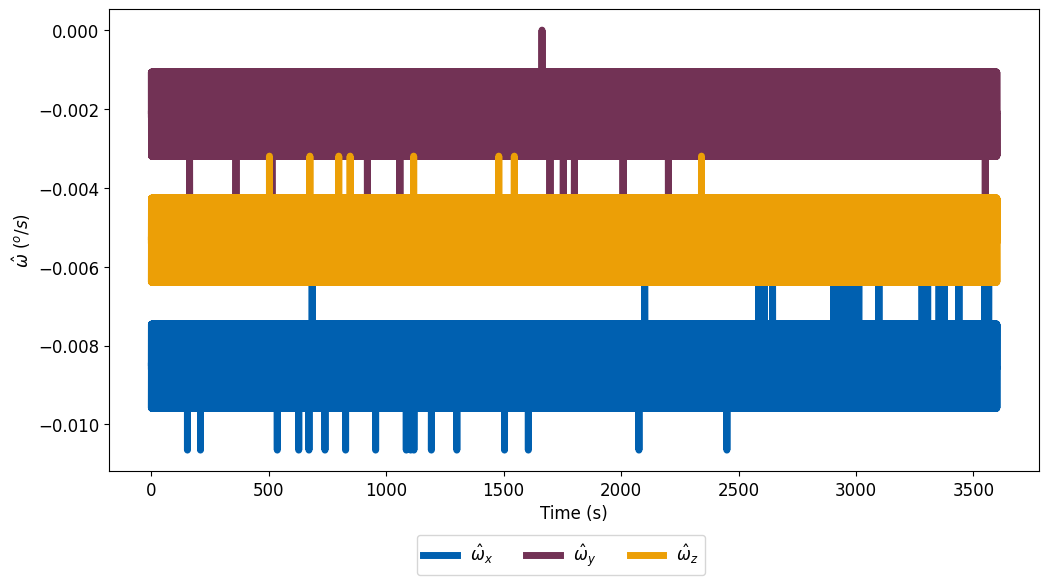

In [4]:
fig1, ax1 = plt.subplots(figsize = (12, 6))
ax1.plot(t_data['df1_t'], gx_data['df1_gx'], linewidth=5, color = "#0060B0", label = "$\hat{\omega}_x$")
ax1.plot(t_data['df1_t'], gy_data['df1_gy'], linewidth=5, color = "#723255", label = "$\hat{\omega}_y$")
ax1.plot(t_data['df1_t'], gz_data['df1_gz'], linewidth=5, color = "#EC9F06", label = "$\hat{\omega}_z$")
ax1.tick_params(axis='both', which='major', labelsize=12)
# ax1.set_ylim([-0.005, 0.005])
ax1.legend(ncol=3, fancybox=True, frameon=True, fontsize=12, bbox_to_anchor=(0.65, -0.12))
ax1.set_xlabel("Time (s)", fontsize=12)
ax1.set_ylabel("$\hat{\omega}$ ($^{o}/s$)", fontsize=12)

IMU_1 SF hat: quantization    0.00000000000000
white           0.00004781970310
flicker         0.00001378416935
walk            0.00000046786062
ramp            0.00000010576807
Name: 0, dtype: float64, quantization    0.00000000000000
white           0.00004530130330
flicker         0.00000719172715
walk            0.00000000000000
ramp            0.00000002119646
Name: 0, dtype: float64, quantization    0.00000000000000
white           0.00004725213641
flicker         0.00001616913297
walk            0.00000000000000
ramp            0.00000004402737
Name: 0, dtype: float64


Text(0, 0.5, 'Allan Variance ($\\hat{\\omega}$)')

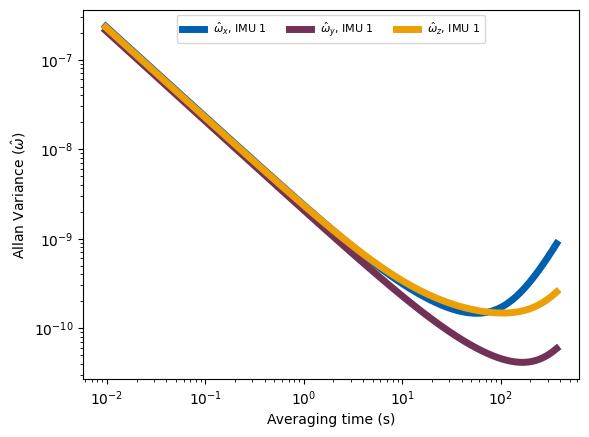

In [7]:
# individual IMUs, omega hat
fig, ax = plt.subplots()
tau_wx, avar_wx = allan_variance.compute_avar(gx_data['df1_gx'], dt5)
tau_wy, avar_wy = allan_variance.compute_avar(gy_data['df1_gy'], dt5)
tau_wz, avar_wz = allan_variance.compute_avar(gz_data['df1_gz'], dt5)
params_wx, avar_pred_wx = allan_variance.estimate_parameters(tau_wx, avar_wx)
params_wy, avar_pred_wy = allan_variance.estimate_parameters(tau_wy, avar_wy)
params_wz, avar_pred_wz = allan_variance.estimate_parameters(tau_wz, avar_wz)
print(f"IMU_1 SF hat: {params_wx}, {params_wy}, {params_wz}")

# Estimated
plt.loglog(tau_wx, avar_pred_wx, '-', label="$\hat{\omega}_x$"+f", IMU 1", linewidth=5, color = "#0060B0")
plt.loglog(tau_wy, avar_pred_wy, '-', label="$\hat{\omega}_y$"+f", IMU 1", linewidth=5, color = "#723255")
plt.loglog(tau_wz, avar_pred_wz, '-', label="$\hat{\omega}_z$"+f", IMU 1", linewidth=5, color = "#EC9F06")

# ax.set_ylim([0.00000001, 0.01])
plt.legend(ncol=3, fancybox=True, frameon=True, fontsize=8, loc='upper center')
plt.xlabel("Averaging time (s)")
plt.ylabel("Allan Variance ($\hat{\omega}$)")